<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment04 
**20165396 박범진**


## 1. Plot the estimated parameters using the training dataset

* plot the estimated parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$ at every iteration of gradient descent until convergence

* the colors for the parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$should be black, red, green, blue, respectively

* the optimization is performed using the training dataset ('data_train.csv')

In [84]:
# Read the files
import csv
import numpy as np

data_train = []
with open('data_train.csv', newline='') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    ct = 1
    for i in reader:
        print('[{}] x = {}, y = {}, z = {}, h={}'.format(ct, i[0], i[1], i[2], i[3]))
        ct +=1
        data_train.append(list(map(np.float32, i)))

with open('data_test.csv', newline='') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    ct = 1
    for i in reader:
        print('[{}] x = {}, y = {}, z = {}, h={}'.format(ct, i[0], i[1], i[2], i[3]))
        ct +=1


[1] x = 0.27354771453665605, y = -8.932101598046074, z = 18.70868394492699, h=73.57882491359598
[2] x = 5.403327323126673, y = 4.782976500936417, z = -18.76220985503919, h=-56.41043333872962
[3] x = 0.029941312523676267, y = -3.2459156984821025, z = 6.9324982114247895, h=52.39076824816363
[4] x = 3.047974457680872, y = 0.7152107112924928, z = -1.9654187170206976, h=-6.936295282007531
[5] x = 1.3020743188547064, y = -5.871807382211632, z = -15.702181352019878, h=-34.99701707942456
[6] x = 0.48067768765626884, y = -2.9117619875044713, z = -2.3631235358529112, h=-19.85473503546304
[7] x = 1.6315020736136816, y = 9.399052248888598, z = 2.47547991106324, h=4.6693089029172725
[8] x = 6.373997103111523, y = 16.58421457152967, z = 17.896253239300936, h=20.327296910572635
[9] x = 7.003140610383589, y = 17.425389177900183, z = -11.921952696244727, h=-96.11724036189486
[10] x = 11.816393974825985, y = 10.214779306945674, z = 9.041430521640162, h=29.8785120150202
[11] x = 6.927811569347049, y = 0.

In [0]:
# Model Training
import random
random.seed(0)
theta = [random.random()]*4
lr = 0.000001

def func(t0,t1,t2,t3, x,y,z): # Function 
    return t0 + t1*x + t2*y + t3*z

def loss(data, t0,t1,t2,t3):
  J =  sum([(func(t0,t1,t2,t3, d[0],d[1],d[2]) - d[3])**2 for d in data])/len(data)/2
  return J

J = loss(data_train,theta[0], theta[1], theta[2], theta[3])
LOSS = [J]
THETA =[[theta[0], theta[1],theta[2],theta[3]]]
        
# train data_train
while True:
  temp = J
  M = len(data_train)
  # Update Theta
  t0,t1,t2,t3 = theta
  theta[0] =theta[0] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3]) for d in data_train])/M
  theta[1] =theta[1] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3])*d[0] for d in data_train])/M
  theta[2] =theta[2] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3])*d[1] for d in data_train])/M
  theta[3] =theta[3] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3])*d[2] for d in data_train])/M
  THETA.append([theta[0], theta[1],theta[2],theta[3]]) # Store Theta
  
  # Update Loss
  J = loss(data_train, theta[0], theta[1], theta[2], theta[3])
  LOSS.append(J)
  if abs(t0-theta[0])  + abs(t1-theta[1]) + abs(t2-theta[2]) + abs(t3-theta[3]) + abs(J-temp) <0.001: # Convergence
    break

Text(0.5, 1.0, 'estimated parameters using the training dataest')

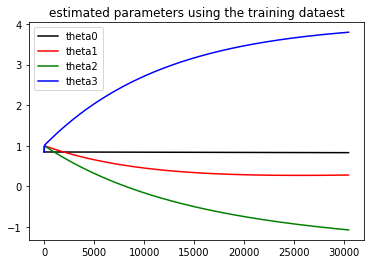

In [98]:
# Plot estimated parameters using the training dataset
import matplotlib.pyplot as plt

colors = ['black', 'red', 'green', 'blue'] 
for i in range(4): # 색깔별로 출력
  plt.plot([t[i] for t in THETA], c=colors[i])
plt.legend(['theta0', 'theta1', 'theta2', 'theta3'])
plt.title('estimated parameters using the training dataest')